## 앙상블
- 단일 결정 트리의 단점을 극복하기 위해 여러 머신러닝 모델을 연결하여 더 강력한 모델로 만드는 방법
- 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측 모형들을 조합하여 하나의 최종 예측 모형으로 만드는 것
- 대표적인 기법: 배깅, 부스팅, 랜덤포레스트

## 배깅
- 주어진 자료를 모집단으로 간주하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각각의 붓스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측 모형을 만드는 것

In [14]:
import pandas as pd

In [15]:
breast = pd.read_csv("./data/breast-cancer.csv")
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

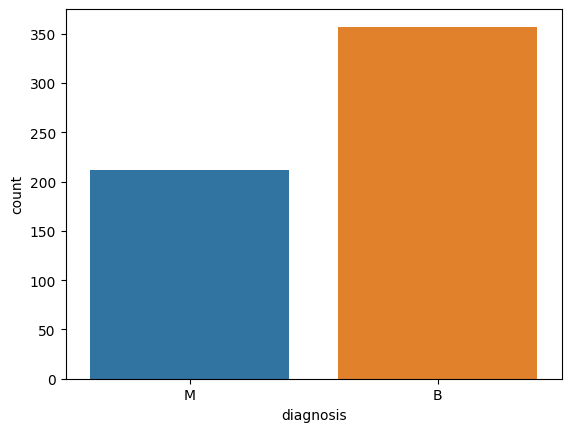

In [17]:
plt.figure()
sns.countplot(x='diagnosis', data=breast)

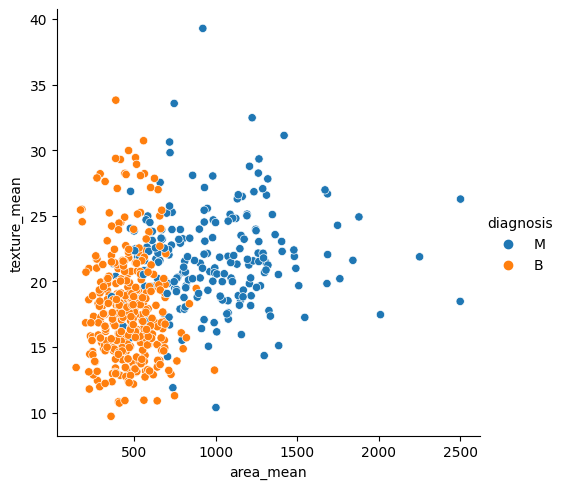

In [18]:
## 설명 변수 area_mean, texture_mean 설정
## 타깃 변수 diagnosis 설정
## 산점도 그래프
sns.relplot(x='area_mean', y='texture_mean', hue='diagnosis', data=breast)

In [19]:
## 진단 데이터를 이산형으로 변경 M이면 1, 아니면 0
import numpy as np
from sklearn.model_selection import train_test_split

In [20]:
breast['diagnosis'] = np.where(breast['diagnosis']== 'M', 1, 0)
features = ['area_mean', 'texture_mean']
x = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [22]:
## 배깅을 이용하여 분류기를 생성 예측 수행
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도: ', clf.score(x_test, pred))

정확도:  1.0


In [23]:
## 혼동행렬을 반환하여 예측 결과를 자세히 확인
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_test, pred),
    index=['true[0]', 'true[1]'],
    columns=['pred[0]', 'pred[1]']
)

,pred[0],pred[1]
true[0],101,6
true[1],16,48


In [26]:
## oob_score를 이용하여 모델 평가
## oob_socre를 True로 설정하면 기능을 사용
## 검증세트나 교차검증을 하지 않아도 되는 장점
clf_oob = BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True)
print(clf_oob.fit(x, y).oob_score_)

0.859402460456942


c:\Python 3.7.1\lib\site-packages\sklearn\ensemble\_bagging.py:707: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
c:\Python 3.7.1\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


In [28]:
## 배깅 방식으로 회귀 분석
## 자동차 데이터를 로드하여 자동차의 가격을 예측
car = pd.read_csv("./data/CarPrice_Assignment.csv")
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [30]:
## 데이터에서 연속형 변수들을 종속변수로 설정
## price 데이터를 타겟 데이터 설정
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling', 'price']))
x = car_num[features]
y = car_num['price']


In [31]:
car_num

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
## 배깅을 이용하여 회귀 분석 모델 생성
## oob_score를 이용하여 모델 평가
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True)
reg = reg.fit(x,y).oob_score_
reg


c:\Python 3.7.1\lib\site-packages\sklearn\ensemble\_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "


0.7694337667344544

## 부스팅
- 예측력이 약한 모형들을 결합해 강한 예측 모형으로 만드는 방법

In [34]:
breast = pd.read_csv("./data/breast-cancer.csv")

breast['diagnosis'] = np.where(breast['diagnosis']== 'M', 1, 0)
features = ['area_mean', 'texture_mean']
x = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [36]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
pred = clf.fit(x_train, y_train).predict(x_test)
print("정확도: ", clf.score(x_test, y_test))


정확도:  0.9122807017543859


In [37]:
## 혼동행렬, 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred= clf.predict(x_test)


test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도', round(test_acc*100,2))
print('정밀도', round(test_prc*100,2))
print('재현율', round(test_rcll*100,2))
print('F1',  round(test_f1*100,2))

[[102   5]
 [ 10  54]]
정확도 91.23
정밀도 91.53
재현율 84.38
F1 87.8


In [38]:
## 변수 중요도를 통해 예측에 사용된 변수들 중 타깃 변수에 영향을 많이 준 변수가 무엇인 지 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances  = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_name', 'importances']
feature_importances

,feature_name,importances
0,area_mean,0.56
1,texture_mean,0.44


In [39]:
## 부스팅 방식으로 회귀 분석
## 차량 데이터를 로드 
car = pd.read_csv('./data/CarPrice_Assignment.csv')
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling', 'price']))
x = car_num[features]
y = car_num['price']

## 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [40]:
## 모델의 예측력 확인
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

정확도:  0.9018569482691864


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE: ', round(mse, 2))
print('MAE: ', round(mae, 2))
print('RMSE: ', round(rmse, 2))
print('ACC: ', round(acc*100, 2))

MSE:  5924956.87
MAE:  1857.26
RMSE:  2434.12
ACC:  90.19


In [43]:
## 변수의 중요도 확인
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances  = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_name', 'importances']
feature_importances

,feature_name,importances
0,boreratio,0.021702
1,carheight,0.003095
2,carlength,0.010364
3,carwidth,0.048997
4,citympg,0.004691
5,compressionratio,0.005041
6,curbweight,0.063702
7,enginesize,0.656314
8,highwaympg,0.047961
9,horsepower,0.099263


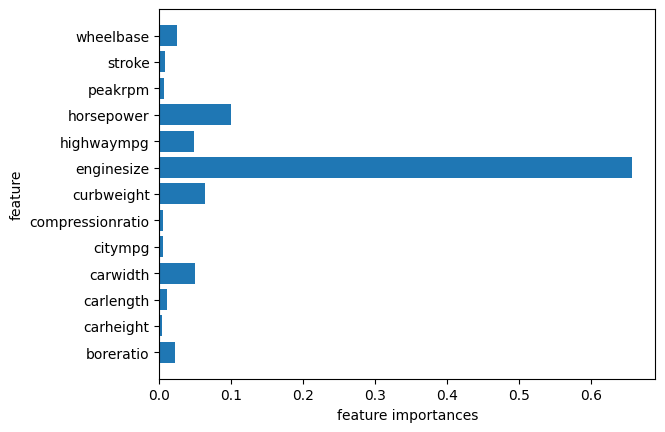

In [45]:
## 변수의 중요도 시각화 표시
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1,n_features)
plt.show()

## 랜덤포레스트
- 배깅과 부스팅보다 더 많은 무작위성을 주어 약한 학습기들을 생성한 후 이를 선형 결합하여 최종 학습기를 만드는 방법

In [46]:
breast = pd.read_csv("./data/breast-cancer.csv")

breast['diagnosis'] = np.where(breast['diagnosis']== 'M', 1, 0)
features = ['area_mean', 'texture_mean']
x = breast[features]
y = breast['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(398, 2) (171, 2) (398,) (171,)


In [48]:
## 모델의 예측력 확인
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, min_samples_split=5)
pred = clf.fit(x_train, y_train).predict(x_test)
print('정확도: ', clf.score(x_test, y_test))

정확도:  0.8947368421052632


In [49]:
## 혼동행렬, 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred= clf.predict(x_test)


test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_prc = precision_score(y_test, pred)
test_rcll = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print('정확도', round(test_acc*100,2))
print('정밀도', round(test_prc*100,2))
print('재현율', round(test_rcll*100,2))
print('F1',  round(test_f1*100,2))

[[102   5]
 [ 13  51]]
정확도 89.47
정밀도 91.07
재현율 79.69
F1 85.0


In [50]:
## 변수의 중요도 확인
importances = clf.feature_importances_
column_nm = pd.DataFrame(['area_mean', 'texture_mean'])
feature_importances  = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_name', 'importances']
feature_importances

,feature_name,importances
0,area_mean,0.702705
1,texture_mean,0.297295


In [51]:
## 랜덤포레스트로 회귀 분석
## 차량 데이터를 로드 
car = pd.read_csv('./data/CarPrice_Assignment.csv')
car_num = car.select_dtypes(['number'])
features = list(car_num.columns.difference(['car_ID','symboling', 'price']))
x = car_num[features]
y = car_num['price']

## 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(143, 13) (62, 13) (143,) (62,)


In [52]:
## 모델의 예측력 확인
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
pred = reg.fit(x_train, y_train).predict(x_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mse)
acc = reg.score(x_test, y_test)

print('MSE: ', round(mse, 2))
print('MAE: ', round(mae, 2))
print('RMSE: ', round(rmse, 2))
print('ACC: ', round(acc*100, 2))

MSE:  4262119.95
MAE:  1325.48
RMSE:  2064.49
ACC:  92.94


In [54]:
## 변수의 중요도 확인
importances = reg.feature_importances_
column_nm = pd.DataFrame(features)
feature_importances  = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_name', 'importances']
feature_importances

,feature_name,importances
0,boreratio,0.004124
1,carheight,0.003931
2,carlength,0.006215
3,carwidth,0.024008
4,citympg,0.007569
5,compressionratio,0.003739
6,curbweight,0.198960
7,enginesize,0.643639
8,highwaympg,0.056334
9,horsepower,0.026047


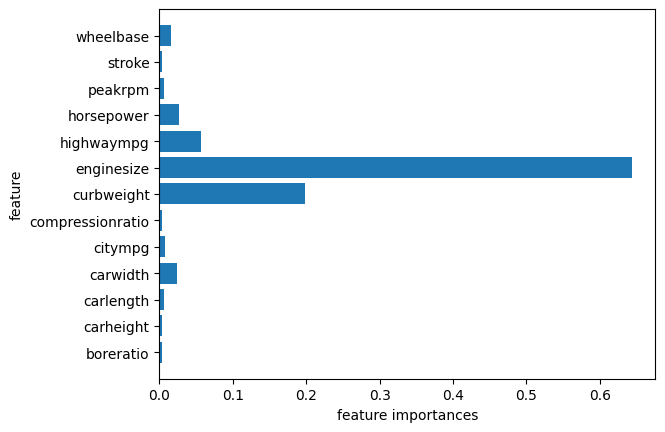

In [55]:
## 변수의 중요도 시각화 표시
n_features = x_train.shape[1]
importances = reg.feature_importances_
column_nm = features

plt.barh(range(n_features), importances, align='center')
plt.yticks(np.arange(n_features), column_nm)
plt.xlabel('feature importances')
plt.ylabel('feature')
plt.ylim(-1,n_features)
plt.show()